In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize

from textblob import TextBlob


#pip.main(["install","twitter"])

import twitter
from twitter import Twitter
from twitter import OAuth

ck = "gwEdUQjvo9JDSLMpii205Q06O"
cs = "OlA4PIlLfpZ5HcEAGPOIJx4DwduhmACShoGQ66mJYt4ocxShwX"
at = "823996990329589760-1wW34frljiy7HrWp777qGFzOhEZksMW"
ats = "nzbKJCBUqlCsP6MNe5CFrOzZHo4wcvbubt1nJTqRkvFiB"

oauth = OAuth(at,ats,ck,cs)

api = Twitter(auth=oauth)




In [3]:
t_loc =api.trends.available()
loc_df=json_normalize(t_loc)
loc_df[(loc_df['countryCode']=='US')&(loc_df['name'].str.contains('New'))]

,country,countryCode,name,parentid,placeType.code,placeType.name,url,woeid
371,United States,US,New Haven,23424977,7,Town,http://where.yahooapis.com/v1/place/2458410,2458410
372,United States,US,New Orleans,23424977,7,Town,http://where.yahooapis.com/v1/place/2458833,2458833
373,United States,US,New York,23424977,7,Town,http://where.yahooapis.com/v1/place/2459115,2459115


In [4]:
ny_trend=api.trends.place(_id=2459115)

In [5]:
nydf = json_normalize(ny_trend,'trends')
nydf.head()

,name,promoted_content,query,tweet_volume,url
0,#TCMParty,None,%23TCMParty,NaN,http://twitter.com/search?q=%23TCMParty
1,#PLN30,None,%23PLN30,28592.0,http://twitter.com/search?q=%23PLN30
2,#Jazz,None,%23Jazz,NaN,http://twitter.com/search?q=%23Jazz
3,#NationalMargaritaDay,None,%23NationalMargaritaDay,NaN,http://twitter.com/search?q=%23NationalMargari...
4,#composer,None,%23composer,NaN,http://twitter.com/search?q=%23composer


In [6]:
nydf.sort_values('tweet_volume',ascending=False).head(5)

,name,promoted_content,query,tweet_volume,url
32,#NeverAgain,None,%23NeverAgain,84374.0,http://twitter.com/search?q=%23NeverAgain
34,#ResignSheriffIsrael,None,%23ResignSheriffIsrael,39793.0,http://twitter.com/search?q=%23ResignSheriffIs...
14,Brassard,None,Brassard,33420.0,http://twitter.com/search?q=Brassard
1,#PLN30,None,%23PLN30,28592.0,http://twitter.com/search?q=%23PLN30
19,Pens,None,Pens,22133.0,http://twitter.com/search?q=Pens


In [10]:

q='StudentsStandUp'
df=pd.DataFrame()
mid = 0
for i in range(10):
    if i==0:
        search_result =api.search.tweets(q=q,count=100)
    else:
        search_result =api.search.tweets(q=q,count=100,max_id=mid)
        
    dftemp = json_normalize(search_result,'statuses')
    mid = dftemp['id'].min()
    mid=mid-1
    df =df.append(dftemp,ignore_index=True)

In [13]:
df

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user,withheld_in_countries
0,None,None,Sat Feb 24 03:45:05 +0000 2018,"{'hashtags': [{'text': 'AlyssaAlhadeff', 'indi...",NaN,0,False,None,967243961625665536,967243961625665536,...,NaN,NaN,17761,False,{'created_at': 'Thu Feb 22 04:30:08 +0000 2018...,"<a href=""http://twitter.com/download/android"" ...","RT @girlsreallyrule: #AlyssaAlhadeff, a studen...",False,"{'id': 3890455648, 'id_str': '3890455648', 'na...",NaN
1,None,None,Sat Feb 24 03:45:04 +0000 2018,"{'hashtags': [{'text': 'ParklandStudents', 'in...","{'media': [{'id': 967102527194845184, 'id_str'...",0,False,None,967243958941347840,967243958941347840,...,NaN,NaN,575,False,{'created_at': 'Fri Feb 23 18:23:07 +0000 2018...,"<a href=""http://twitter.com/download/iphone"" r...",RT @Marmel: Met life dumps the NRA.\n#Parkland...,False,"{'id': 44066494, 'id_str': '44066494', 'name':...",NaN
2,None,None,Sat Feb 24 03:45:04 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,967243958085660672,967243958085660672,...,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",Admissions officers take a stand to back high ...,True,"{'id': 41665988, 'id_str': '41665988', 'name':...",NaN
3,None,None,Sat Feb 24 03:45:02 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,967243947163701253,967243947163701253,...,NaN,NaN,233,False,{'created_at': 'Thu Feb 22 02:56:47 +0000 2018...,"<a href=""https://twitter.com/JoeBidenTweets"" r...",RT @RealSaavedra: Joe Biden was behind the leg...,False,"{'id': 833886478379917312, 'id_str': '83388647...",NaN
4,None,None,Sat Feb 24 03:45:01 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,967243944454103040,967243944454103040,...,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",@justinbieber @LouDobbs @amjoyshow @maddow @TH...,True,"{'id': 339001318, 'id_str': '339001318', 'name...",NaN
5,None,None,Sat Feb 24 03:44:59 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,967243935507779584,967243935507779584,...,NaN,NaN,592,False,{'created_at': 'Fri Feb 23 01:39:15 +0000 2018...,"<a href=""http://twitter.com/download/android"" ...",RT @KennKaufman: The legacy of Marjory Stonema...,False,"{'id': 102229994, 'id_str': '102229994', 'name...",NaN
6,None,None,Sat Feb 24 03:44:56 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,967243923893751808,967243923893751808,...,NaN,NaN,772,False,{'created_at': 'Fri Feb 23 12:27:23 +0000 2018...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @The_UnSilent_: A trained good guy with a g...,False,"{'id': 21893678, 'id_str': '21893678', 'name':...",NaN
7,None,None,Sat Feb 24 03:44:52 +0000 2018,"{'hashtags': [{'text': 'SecondAmendment', 'ind...",NaN,0,False,None,967243904968994817,967243904968994817,...,NaN,NaN,37,False,{'created_at': 'Fri Feb 23 20:28:05 +0000 2018...,"<a href=""http://twitter.com/download/iphone"" r...",RT @DanielleMuscato: A few words about the #Se...,False,"{'id': 44066494, 'id_str': '44066494', 'name':...",NaN
8,None,None,Sat Feb 24 03:44:50 +0000 2018,"{'hashtags': [{'text': 'AlyssaAlhadeff', 'indi...",NaN,0,False,None,967243896274104320,967243896274104320,...,NaN,NaN,17761,False,{'created_at': 'Thu Feb 22 04:30:08 +0000 2018...,"<a href=""http://twitter.com/download/iphone"" r...","RT @girlsreallyrule: #AlyssaAlhadeff, a studen...",False,"{'id': 824146708863086594, 'id_str': '82414670...",NaN
9,None,None,Sat Feb 24 03:44:48 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,967243888883896320,967243888883896320,...,NaN,NaN,3004,False,{'created_at': 'Thu Feb 22 04:13:53 +0000 2018...,"<a href=""https://mobile.twitter.com"" rel=""nofo...","RT @Liz_Wheeler: Next up, let's do a

In [12]:
df.shape

(997, 31)

In [14]:
df['text']

0      RT @girlsreallyrule: #AlyssaAlhadeff, a studen...
1      RT @Marmel: Met life dumps the NRA.\n#Parkland...
2      Admissions officers take a stand to back high ...
3      RT @RealSaavedra: Joe Biden was behind the leg...
4      @justinbieber @LouDobbs @amjoyshow @maddow @TH...
5      RT @KennKaufman: The legacy of Marjory Stonema...
6      RT @The_UnSilent_: A trained good guy with a g...
7      RT @DanielleMuscato: A few words about the #Se...
8      RT @girlsreallyrule: #AlyssaAlhadeff, a studen...
9      RT @Liz_Wheeler: Next up, let's do a town hall...
10     RT @ChrisJZullo: When kid on the playground th...
11     RT @RichardRSmithJr: @benshapiro @DLoesch @NRA...
12     RT @BrianBalthazar: The kids at the CNN town h...
13     RT @BarbraStreisand: These amazing kids are th...
14     @longlivekcx #StudentsStandUp @NeverAgainMSD #...
15     RT @Dennis_Kucinich: The youth are leading us,...
16     NRA members make up approximately 1.5% of the ...
17     RT @aletweetsnews: Woah.

In [15]:
tweettext = df['text']

In [16]:
tweettext = df['text']
blob = TextBlob(tweettext[0])
list(blob.noun_phrases)

['rt', '@ girlsreallyrule', 'alyssaalhadeff', 'high school']

In [17]:
wordlist =pd.DataFrame()
for t in tweettext:
    tx =TextBlob(t)
    l = list(tx.noun_phrases)
    if len(l)!=0:
        wordlist =wordlist.append(l,ignore_index=True)

In [26]:
allword = wordlist.groupby(0).size()
allword

0
# 2a                                          1
# 2a #                                        1
# 2a # 2adefenders # 2n…                      5
# 2a https                                    2
# 2a sheriff #                                1
# 2ndamendment town hall                      1
# 39t…                                        1
# constitution ...                            1
# family #                                    1
# glasgow #                                   1
# guncontrol #                                2
# gunsense #                                  1
# neveragain #                                1
# neveragain # goputin #                      2
# neveragain speaker                          1
# polls #                                     1
# tcot # ccot # morningjoe #                  1
# trump #                                     1
# trumputin #                                 2
# गुरू_का_ज्ञान htt…                          1
# …                                   

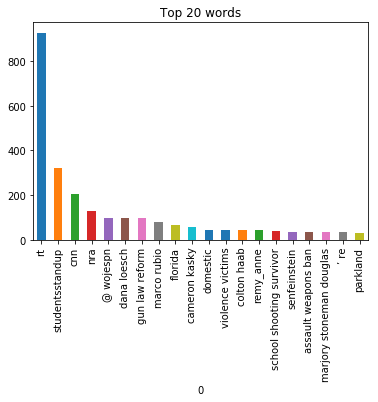

In [30]:
top20allword =allword.sort_values(0,ascending=False).head(20)
top20allword.plot(kind='bar',title='Top 20 words')

In [35]:
wordlist =pd.DataFrame()
for t in tweettext:
    tx =TextBlob(t)
    ww=[]
    for word, tag in tx.tags:
        if tag in ('NN','NNS','NNP','NNPS'):
            ww.append(word.lemmatize())
    if len(ww) !=0:
        wordlist = wordlist.append(ww,ignore_index=True)
        

In [36]:
allword = wordlist.groupby(0).size()
allword

0
%                    11
-Content              1
-Good                 1
-Set                  1
-the                  2
//t.co/02QZgJyhXF     1
//t.co/0aarhBYsxk     1
//t.co/1JsbLEQUGz     1
//t.co/1LIn8RGC6r     1
//t.co/1Wf2daTUHa     1
//t.co/2RU9xWw2h8     1
//t.co/2eFqMoLNHA     1
//t.co/2ouSi2ODzg     1
//t.co/46iKq5xkL2     1
//t.co/4pxdi3J5kJ     1
//t.co/5LMG1ajDrl     1
//t.co/7WxBB4X2xE     1
//t.co/8OaO5Te1Ln     1
//t.co/8YRx4fbEPO     1
//t.co/AauMu9…        1
//t.co/CSPzx…         1
//t.co/ClLgmpI8W1     5
//t.co/Cq54SqqFWC     1
//t.co/DXKaGYuh2r     1
//t.co/DZSXJWgB47     1
//t.co/F1LIbI4xO4     1
//t.co/FInd1YYAat     1
//t.co/GnNyiM6zfs     3
//t.co/HFmDoKCwWd     2
//t.co/Hs858xXEMA     1
                     ..
w…                    3
xHummingbird505       2
xo_karmin_ox          6
ya                    1
year                 31
yeste…                1
yet…                  1
younglionsdance       1
youth                 1
you…                  1
yo…           

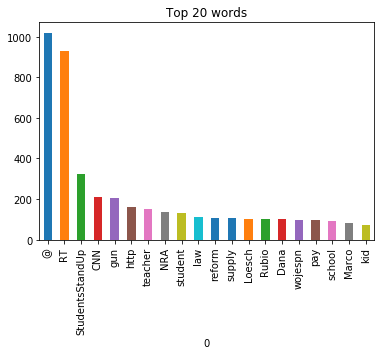

In [37]:
top20allword =allword.sort_values(0,ascending=False).head(20)
top20allword.plot(kind='bar',title='Top 20 words')